In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.getcwd()

Cranial = pd.read_csv('/Users/88firefly/Feline-Bones-Final-Project/data/Felidae Cranial Data.csv',delimiter=',')
Forelimb= pd.read_csv('/Users/88firefly/Feline-Bones-Final-Project/data/Felidae and Canidae postcranial database.csv',delimiter=',')

Forelimb_Data=Forelimb.values[:261,:] #cut out dogs

Forelimb_genusID=Forelimb_Data[:,2]
Forelimb_speciesID=Forelimb_Data[:,3]
Forelimb_sexID=Forelimb_Data[:,4]

Cranial_Data=Cranial.values

Cranial_genusID=Cranial_Data[:,2]
Cranial_speciesID=Cranial_Data[:,3]
Cranial_sexID=Cranial_Data[:,4]

print("The Cranial dataset has", np.unique(Cranial[['Species']]).shape, "unique species, and", Cranial.shape, "samples.")
print("The Forelimb dataset has", np.unique(Forelimb[['Species']]).shape, "unique species, and", Forelimb.shape, "samples.")



The Cranial dataset has (77,) unique species, and (338, 52) samples.
The Forelimb dataset has (95,) unique species, and (323, 61) samples.


In [16]:
ComboData_All=Cranial.merge(Forelimb,how='outer', on=None, left_on='Catalog no.', right_on='Catalog no.')
ComboData_Shared=Cranial.merge(Forelimb,how='inner', on=None, left_on='Catalog no.', right_on='Catalog no.')
print(ComboData_Shared.head)

<bound method NDFrame.head of     Museum_x Catalog no.       Genus_x                Species_x    Sex_x  \
0        MVZ      184066      Acinonyx                  jubatus  unknown   
1       FMNH       34589      Acinonyx                  jubatus     male   
2       FMNH       34589      Acinonyx                  jubatus     male   
3       FMNH      135042      Caracal                   caracal  unknown   
4       USNM      384162      Caracal                   caracal   female   
5       FMNH       72804      Catopuma               temminckii   female   
6       USNM      339645      Catopuma               temminckii  unknown   
7       USNM      362188      Catopuma               temminckii   female   
8       USNM      395843      Catopuma               temminckii   female   
9       FMNH       98908      Catopuma               temminckii     male   
10      USNM      176049         Felis            chaus affinis   female   
11      FMNH      159995         Felis                marg

# def NullsInFrame(df):
    if df.isnull().values.any() == True:
        df_a = df.isnull().sum().sum()
        df_b = df.shape[0]*df.shape[1]
        print("There are", df_a, "NaN(s) out of,", df_b ,"total cells, which is", 100*df_a/df_b,"% of the data."  )
    else:
        print("No NaN")

In [13]:
NullsInFrame(Cranial)

There are 439 NaN(s) out of, 17576 total cells, which is 2.4977241693218026 % of the data.


In [5]:
NullsInFrame(Forelimb)

There are 2694 NaN(s) out of, 19703 total cells, which is 13.673044714002943 % of the data.


In [6]:
NullsInFrame(ComboData_Shared)

There are 917 NaN(s) out of, 12096 total cells, which is 7.581018518518518 % of the data.


In [7]:
NullsInFrame(ComboData_All)

There are 27959 NaN(s) out of, 62048 total cells, which is 45.06027591542032 % of the data.


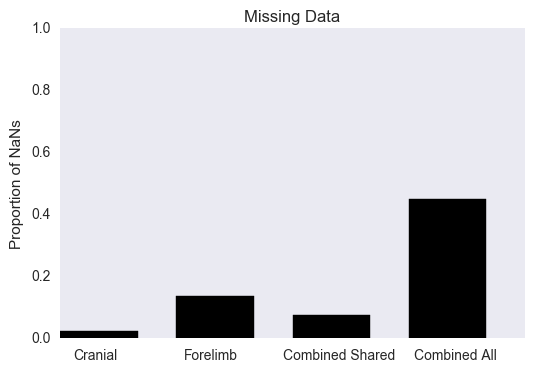

In [14]:
NaNpercentages = np.array([0.024977, 0.136730, 0.075810, 0.450602])
dfNames = np.array([["Cranial Data", "Forelimb Data", "Combined Overlap Data", "Combined Data"]])

y = NaNpercentages
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="black")
plt.title('Missing Data')
plt.ylabel('Proportion of NaNs')
plt.xlabel('')
plt.grid(b=0)
plt.xticks([0.3, 1.3, 2.4, 3.4], ["Cranial", "Forelimb", "Combined Shared", "Combined All"])
plt.ylim(0, 1)
plt.savefig('NaNGraph.jpg')

In [15]:
ComboShared_Data=ComboData_Shared.values
ComboAll_Data=ComboData_All.values

from sklearn.preprocessing import Imputer
print(ComboShared_Data[-1,:])  #52-57 unnecessary

ComboShared_NumData=np.delete(ComboShared_Data,np.arange(52,58),axis=1)
print(ComboShared_NumData[-1,:])

imp=Imputer(missing_values='NaN', strategy='mean', axis=0, copy=True)
Cranial_filled_data=imp.fit_transform(Cranial_Data[:,7:])
Forelimb_filled_data=imp.fit_transform(Forelimb_Data[:,7:])
ComboShared_filled_data=imp.fit_transform(ComboShared_NumData[:,7:])

['MVZ' '81547' 'Puma' 'concolor' 'unknown' 'U.S.'
 'Montana; Bitterroot river' 224.7 68.0 90.0 67.4 85.7 64.9 155.3 83.8 46.7
 79.1 24.2 59.0 74.6 42.3 93.8 6.5 5.2 14.8 12.3 10.0 15.4 12.3 22.9 64.7
 24.8 14.1 10.6 9.1 13.2 6.8 11.1 15.2 8.5 17.7 8.8 45.7 27.3 73.5 79.0
 144.9 27.6 15.0 25.4 14.6 42.3 'MVZ' 'Puma' 'concolor' 'unknown' 'U.S.'
 'Montana; Bitterroot river' 258.4 45.5 208.2 24.3 26.6 19.1 40.8 26.6 29.3
 18.4 248.7 62.8 23.0 63.1 39.0 42.3 83.4 14.3 18.5 16.8 15.2 10.6 90.9
 17.6 15.5 17.0 15.7 10.5 86.4 13.1 15.1 15.4 15.0 8.9 71.3 15.6 12.9 15.8
 14.8 9.1 35.2 15.0 12.4 10.8 9.0 9.2 28.0 13.0 11.4 11.7 8.6 8.8 25.7 19.4]
['MVZ' '81547' 'Puma' 'concolor' 'unknown' 'U.S.'
 'Montana; Bitterroot river' 224.7 68.0 90.0 67.4 85.7 64.9 155.3 83.8 46.7
 79.1 24.2 59.0 74.6 42.3 93.8 6.5 5.2 14.8 12.3 10.0 15.4 12.3 22.9 64.7
 24.8 14.1 10.6 9.1 13.2 6.8 11.1 15.2 8.5 17.7 8.8 45.7 27.3 73.5 79.0
 144.9 27.6 15.0 25.4 14.6 42.3 258.4 45.5 208.2 24.3 26.6 19.1 40.8 26.6
 29.3 18.